In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Go to Python folder to import routines
if os.getcwd() != r'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Olivia': 
    os.chdir(r'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Olivia')
print('Current directory: ', os.getcwd())
print('Python folders: ', [x for x in os.listdir() if '.' not in x])
# Import routines
from EffectiveMedia.GranularModels import Walton_modified
from Fluid.Gassmann import isoGassmann, fluidWood
from Hydro.hydro_models import Swe_from_wt_VG
from Utils.bounds import HillAvr
from Utils.elastic_param import Vp_from_K_G, Vs_from_G
def __Swe(Sw,Swr):
    return((Sw-Swr)/(1-Swr))
# Routine stair_case
def __function_staircase(depth,Vp,Vs,Rho,time): # permet de faire une fonction escalier type modèle de vitesse
    # Vp est un vecteur
    # Vs est un vecteur
    # Rho est une matrice
    # time est l'index de temps correspondant pour le modèle
    x=[]
    y=[]
    for i in range(depth.size-1):
        X=np.zeros(2)
        Y=np.zeros(2)
        X[:]=Vs_refz[i][time]
        Y[0]=depth[i]
        Y[1]=depth[i+1]
        x.append(X)
        y.append(Y)
    x=np.asarray(x)
    y=np.asarray(y)
    x=np.asarray(x).reshape(x.size)
    y=np.asarray(y).reshape(y.size)
    dVs=np.asarray(x)
    dVsdepth=np.asarray(y)
    x=[]
    y=[]
    for i in range(depth.size-1):
        X=np.zeros(2)
        Y=np.zeros(2)
        X[:]=Vp_refz[i][time]
        Y[0]=depth[i]
        Y[1]=depth[i+1]
        x.append(X)
        y.append(Y)
    x=np.asarray(x)
    y=np.asarray(y)
    x=np.asarray(x).reshape(x.size)
    y=np.asarray(y).reshape(y.size)
    dVp=np.asarray(x)
    dVpdepth=np.asarray(y)
    x=[]
    y=[]
    for i in range(depth.size-1):
        X=np.zeros(2)
        Y=np.zeros(2)
        X[:]=Rho[i,time]
        Y[0]=depth[i]
        Y[1]=depth[i+1]
        x.append(X)
        y.append(Y)
    x=np.asarray(x)
    y=np.asarray(y)
    x=np.asarray(x).reshape(x.size)
    y=np.asarray(y).reshape(y.size)
    dVrho=np.asarray(x)
    dVrhodepth=np.asarray(y)
    return(dVp,dVs,dVrho,dVrhodepth)
dc_data=np.loadtxt(r'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\modele_vitesse/vitesse400.txt')
dc_data=np.asarray(dc_data)
v=dc_data[:,1]
times=dc_data[:,0].astype('int')

Current directory:  C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Olivia
Python folders:  ['EffectiveMedia', 'Fluid', 'Hydro', 'Utils']


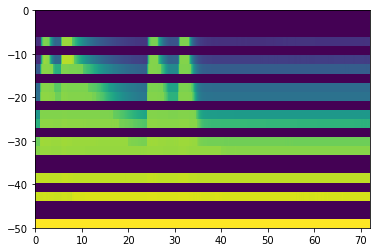

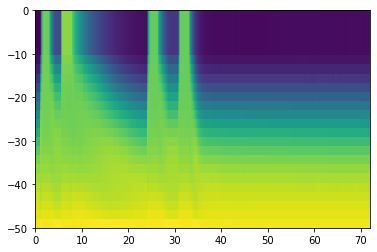

In [2]:
New_Depth=-np.arange(2,50,2)
Sw, Pw, Pf, depth = np.load(r'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Hydro/Saturation_Pw_Pf_depth.npy',allow_pickle=True)
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
Sw_new=np.zeros((New_Depth.size,Sw[0].size))
for i in range(depth.size):
    idx=find_nearest(New_Depth,depth[i])
    Sw_new[idx]=Sw[i]
SS=Sw_new.copy()
plt.imshow(Sw_new,aspect='auto',extent=[0,72,-50,0])    
Sw_new[0]=Sw_new[4]
Sw_new[1]=Sw_new[4]
Sw_new[2]=Sw_new[4]
Sw_new[3]=Sw_new[4]
Sw_new[4]=Sw_new[4]

for i in range(25920):
    y = Sw[:,i]
    x = depth
    z = np.polyfit(x, y, 4)
    p = np.poly1d(z)
    j=p(New_Depth)
    Sw_new[:,i]=j

### Saturation extrapolation between - 9 and 0     
Sw_new[0]=Sw_new[4]
Sw_new[1]=Sw_new[4]
Sw_new[2]=Sw_new[4]
Sw_new[3]=Sw_new[4]


#Sw_new[-4]=Sw_new[-5]*1.0001
#Sw_new[-3]=Sw_new[-4]*1.0001
#Sw_new[-2]=Sw_new[-3]*1.0001
#Sw_new[-1]=Sw_new[-2]*1.0001

plt.figure()
plt.imshow(Sw_new,aspect='auto',extent=[0,72,-50,0])    


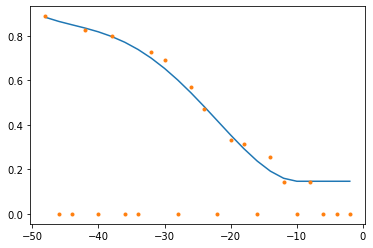

In [3]:
plt.plot(New_Depth,Sw_new[:,0])
y = Sw[:,i]
x = depth
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
j=p(New_Depth)
plt.plot(New_Depth,SS[:,0],'.')

In [21]:
os.getcwd()

'C:\\Users\\Thomas\\OneDrive\\Bureau\\Data_article_2024\\Olivia'

In [4]:
Vp=[]
Vs=[]
Vp_ref2=[]
Vs_ref2=[]
Vp_refz=[]
Vs_refz=[]
t_ref1 = int(2300*60/10)
t_ref2 = int(3000*60/10)
Vp0=[]
Vs0=[]
Vp1=[]
Vs1=[]
Vp2=[]
Vs2=[]
Vb=[]
Vbref=[]
corr=+0
Peff=[]
Rho=[]
for i in range(New_Depth.size):
    #data=np.load(rf'C:\Hydro_modele\dv_compute\{abs(depth[i])+corr}_Pz.npy')
    PzR_depth=abs(New_Depth[i])
    #data=np.load(rf'C:\Hydro_modele\dv_compute\Test_Modeling_petro_{phi}1_cmInterp_SwPf_Phi_0v2_{PzR_depth}_{PiezoRef}__piezo_depth_{Pz_depth}_add_BG.npy')
    data=np.load(rf'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Modèle\Test_Modeling_petro_0.41_cmInterp_SwPf_Phi_0v2_{PzR_depth}_Pz__piezo_depth_52_add_BG.npy',allow_pickle=True)
    #data=np.load(rf'C:\Hydro_modele\dv_compute\Modeling_petro_{phi}1_cmInterp_SwPf_Phi_0v2_{PzR_depth}_{PiezoRef}_add_BG.npy',allow_pickle=True)
    #1_cmInterp_SwPf_Phi_0v2_{PzR_depth}_{PiezoRef}_add_BG.npy',allow_pickle=True)
    Vp.append(data[0])
    Vs.append(data[1])
    Vp_ref2.append(data[2])
    Vs_ref2.append(data[3])
    Vp_refz.append(data[4])
    Vs_refz.append(data[5])
    Vb.append(data[8])
    Vp0.append(np.nanmean(data[0][t_ref1:t_ref2]))
    Vs0.append(np.nanmean(data[1][t_ref1:t_ref2]))
    Vp1.append(np.nanmean(data[2][t_ref1:t_ref2]))
    Vs1.append(np.nanmean(data[3][t_ref1:t_ref2]))
    Vp2.append(np.nanmean(data[4][t_ref1:t_ref2]))
    Vs2.append(np.nanmean(data[5][t_ref1:t_ref2]))
    Vbref.append(np.nanmean(data[8][t_ref1:t_ref2]))
    Peff.append(data[-1])
    Rho.append(data[-2])
print(len(Vs0))
dvp=[]
dvs=[]
dvp1=[]
dvs1=[]
dvp2=[]
dvs2=[]
dvGBW=[]
for i in range(New_Depth.size):
    dvp.append((Vp[i]-Vp0[i])/Vp0[i]*1e2)
    dvs.append((Vs[i]-Vs0[i])/Vs0[i]*1e2)
    dvp1.append((Vp_ref2[i]-Vp1[i])/Vp1[i]*1e2)
    dvs1.append((Vs_ref2[i]-Vs1[i])/Vs1[i]*1e2)
    dvp2.append((Vp_refz[i]-Vp2[i])/Vp2[i]*1e2)
    dvs2.append((Vs_refz[i]-Vs2[i])/Vs2[i]*1e2)
    dvGBW.append((Vb[i]-Vbref[i])/Vb[i]*1e2)
dvR=np.load(r'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\dv\dv_median.npy')
tT=np.linspace(0,72*60,dvR.size)
t = tT
#plt.savefig('F:\Fig_to_make/depth_model.pdf',format='pdf',bbox_inches='tight',dpi=300)
#plt.savefig('F:\Fig_to_make/depth_model.jpg',format='jpg',bbox_inches='tight',dpi=300)



24


C:\Users\Thomas\Anaconda3\envs\obspy\lib\site-packages\ipykernel_launcher.py:104: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


<Figure size 1080x1080 with 0 Axes>

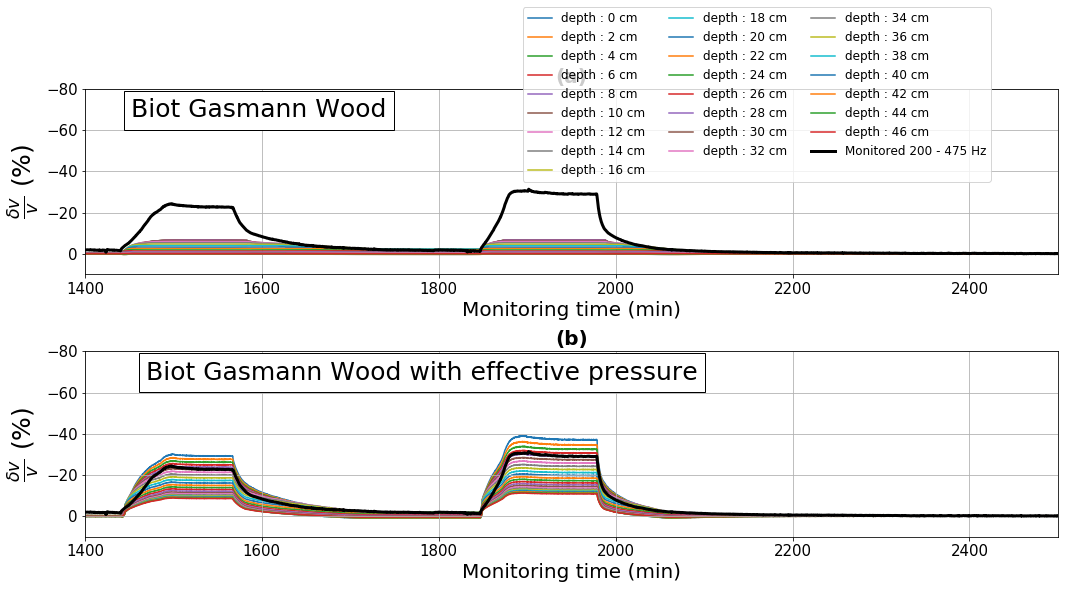

In [19]:
dvR=np.load(r'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\dv/dv_median.npy')
#dvR=np.asarray(dvR)
#dvR=np.mean(dvR[0:8,:],0)
tT=np.linspace(0,72*60,dvR.size)
BG=np.load(r'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\dv/Bg.npy')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(15,15),constrained_layout=True)
C=['(a)','(b)']
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(15,15),constrained_layout=True)
gs = gridspec.GridSpec(4, 4)

ax4 = plt.subplot(gs[0, :])
ax1 = plt.subplot(gs[1, :])
ax=ax1
data=[]
for i in range(0,New_Depth.size):#depth.size-1):
    ax.plot(tT,dvs2[i],label=f'Depth : {abs(New_Depth[i])} cm',zorder=1)
    data.append(dvs2[i])
ax.plot(tT,dvR,'black',label=f'Monitored {200} - {475} Hz',linewidth=3,zorder=2)
ax.set_xlim(1400,2500)
ax.set_xlabel('Monitoring time (min)',fontsize=20)
ax.set_ylabel(r'$\delta v$ (%)',fontsize=20)
ax.grid()
ax.set(xlabel='Monitoring time (min)', xlim=[1400,2500],
       ylabel=r'$\frac{\delta v}{v}$ (%)', ylim=[-80,10])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.set_ylabel(r'$\frac{\delta v}{v}$ (%)',fontsize=25)
ax.set_ylim(10,-80)
ax.annotate(r'Biot Gasmann Wood with effective pressure', (1400, -70),
            xytext=(0.63, 0.95), textcoords='axes fraction',
            ha="right", va="top",
            bbox=dict(boxstyle="square",
                   ec=(0., 0, 0),
                   fc=(1., 1, 1),
                   )    ,        
            fontsize=25,
            horizontalalignment='right', verticalalignment='top')
ax.set_title('(b)',fontsize=20,y=1,fontweight="bold")
ax=ax2
'''
plt.text(2218,35, "WET", size=20,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
'''
#plt.text(1611,35, "DRY", size=20,
#         ha="right", va="top",
#         bbox=dict(boxstyle="square",
#                   ec=(1., 0.5, 0.5),
#                   fc=(1., 0.8, 0.8),
#                   )
#         )
ax.set_xlim(0,0.3)
ax.set_ylim(0.29,0)
ax.set_xlabel('Sensitivity R to Vs',fontsize=20)
ax.set_ylabel('Depth (m)',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.grid()
ax=ax3
ax.set_xlim(0,0.3)
ax.set_ylim(0.29,0)
ax.set_xlabel('Sensitivity R to Vs',fontsize=20)
ax.set_ylabel('Depth (m)',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
#ax.set_title(C[2],fontsize=20,y=1,fontweight="bold")
ax.grid()
ax=ax4
for i in range(0,New_Depth.size):#depth.size-1):
    ax.plot(tT,dvGBW[i],label=f'depth : {abs(New_Depth[i])} cm')

ax.plot(tT,dvR,'k',label=f'Monitored {200} - {475} Hz',linewidth=3,zorder=2)
ax.set_xlim(1400,2500)
#ax.legend(fontsize=12,loc=(0.7,0.15))
ax.grid()
ax.set(xlabel='Monitoring time (min)', xlim=[1400,2500],
       ylabel=r'$\delta v$ (%)', ylim=[-80,10])
ax.set_xlabel('Monitoring time (min)',fontsize=20)
ax.set_ylabel(r'$\frac{\delta v}{v}$ (%)',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.set_title('(a)',fontsize=20,y=1,fontweight="bold")
ax.set_ylabel(r'$\frac{\delta v}{v}$ (%)',fontsize=25)
ax.set_ylim(10,-80)
ax.annotate(r'Biot Gasmann Wood', (1400, -70),
            xytext=(0.31, 0.95), textcoords='axes fraction',
            ha="right", va="top",
            bbox=dict(boxstyle="square",
                   ec=(0., 0, 0),
                   fc=(1., 1, 1),
                   )    ,        
            fontsize=25,
            horizontalalignment='right', verticalalignment='top')
ax.legend(fontsize=12,loc=(0.45,0.5),ncol=3)

fig.tight_layout()

#plt.savefig('F:\Fig_to_make/ModelKernel_Sw.pdf',format='pdf',bbox_inches='tight',dpi=300)
#plt.savefig('F:\Fig_to_make/ModelKernel_Sw.jpg',format='jpg',bbox_inches='tight',dpi=300)

C:\Users\Thomas\Anaconda3\envs\obspy\lib\site-packages\ipykernel_launcher.py:138: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


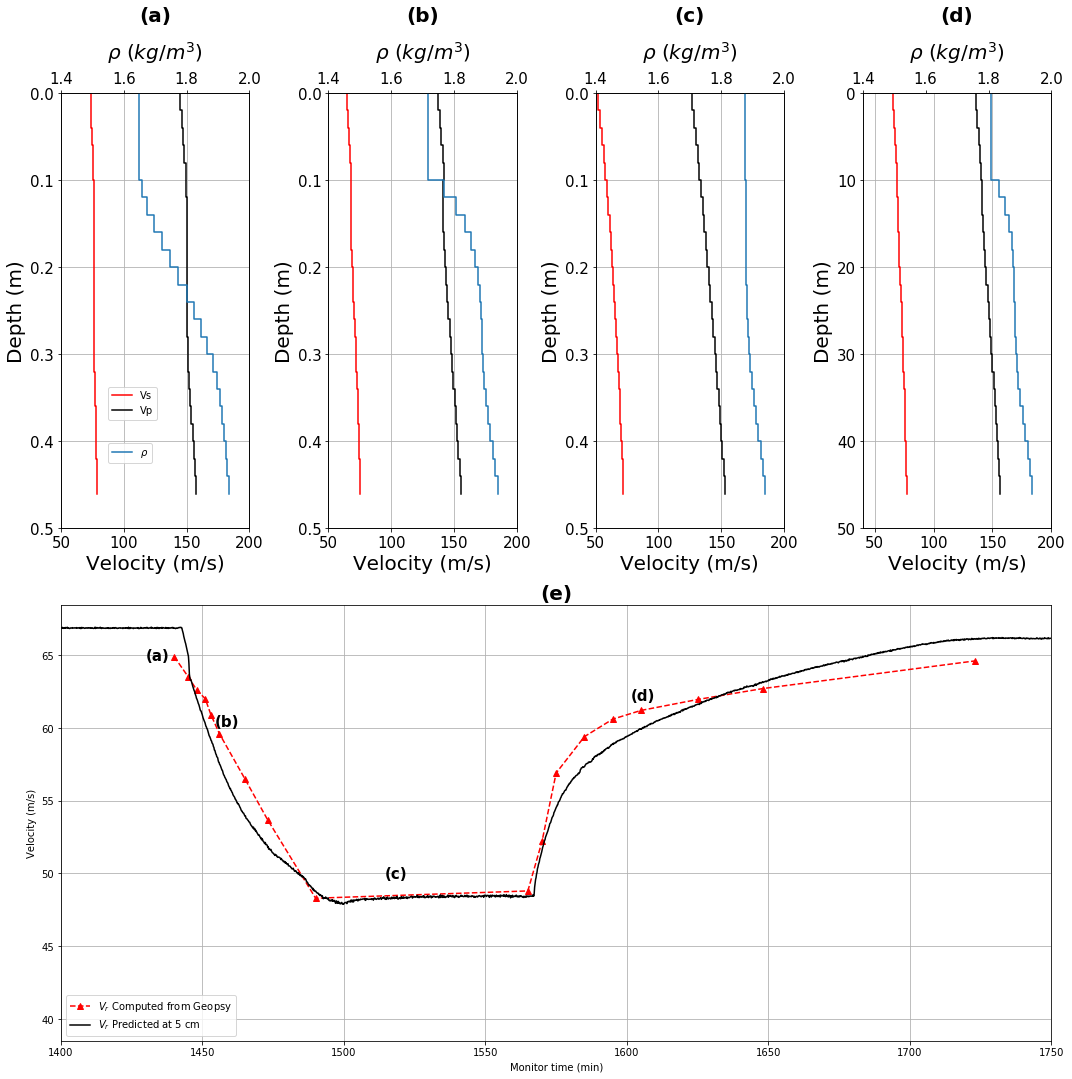

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
New_Depth=-np.arange(0,48,2)

fig = plt.figure(figsize=(15,15),constrained_layout=True)
gs = gridspec.GridSpec(4, 4)
ax1 = plt.subplot(gs[0:2,0])
ax2 = plt.subplot(gs[0:2, 1])
ax3 = plt.subplot(gs[0:2, 2])
ax4 = plt.subplot(gs[0:2, 3])
ax5 = plt.subplot(gs[2::, :])


dvP,dvS,dvRho,prof=__function_staircase(-New_Depth,Vp_refz,Vs_refz,Rho[0],times[0]*6)
#dvP=np.concatenate((np.asarray([dvP[0]]),dvP))
#dvS=np.concatenate((np.asarray([dvS[0]]),dvS))
#dvRho=np.concatenate((np.asarray([dvRho[0]]),dvRho))
#prof=np.concatenate((np.asarray([0]),prof))
prof=prof*10**-2
ax1.plot(dvS*1000,prof,'r',label='Vs')
ax1.plot(dvP*1000,prof,'k',label='Vp')
ax1.set_ylim(0.5,0)
ax11 = ax1.twiny()
ax11.plot(dvRho,prof,label=r'$\rho$')
ax11.set_xlim(1.4,2)
ax11.set_xlabel(r'$\rho \ (kg/m^3)$',fontsize=20,labelpad=12)
ax1.set_xlabel('Velocity (m/s)',fontsize=20)
ax1.grid()
ax1.set_ylabel('Depth (m)',fontsize = 20)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax11.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlim(50,200)
ax11.legend(loc=(0.25,0.15))
ax1.legend(loc=(0.25,0.25))


dvP,dvS,dvRho,prof=__function_staircase(-New_Depth,Vp_refz,Vs_refz,Rho[0],times[4]*6)
dvP=np.concatenate((np.asarray([dvP[0]]),dvP))
dvS=np.concatenate((np.asarray([dvS[0]]),dvS))
dvRho=np.concatenate((np.asarray([dvRho[0]]),dvRho))
prof=np.concatenate((np.asarray([0]),prof))
prof=prof*10**-2
ax2.plot(dvS*1000,prof,'r')
ax2.plot(dvP*1000,prof,'k')
ax2.set_ylim(0.5,0)
ax22 = ax2.twiny()
ax22.plot(dvRho,prof)
ax22.set_xlim(1.4,2)
ax22.set_xlabel(r'$\rho \ (kg/m^3)$',fontsize=20,labelpad=12)
ax2.set_xlabel('Velocity (m/s)',fontsize=20)
ax2.grid()
ax2.set_ylabel('Depth (m)',fontsize = 20)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax22.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlim(50,200)



dvP,dvS,dvRho,prof=__function_staircase(-New_Depth,Vp_refz,Vs_refz,Rho[0],1530*6)
dvP=np.concatenate((np.asarray([dvP[0]]),dvP))
dvS=np.concatenate((np.asarray([dvS[0]]),dvS))
dvRho=np.concatenate((np.asarray([dvRho[0]]),dvRho))
prof=np.concatenate((np.asarray([0]),prof))
prof=prof*10**-2
ax3.plot(dvS*1000,prof,'r')
ax3.plot(dvP*1000,prof,'k')
ax3.set_ylim(0.5,0)
ax33 = ax3.twiny()
ax33.plot(dvRho,prof)
ax33.set_xlim(1.4,2)
ax33.set_xlabel(r'$\rho \ (kg/m^3)$',fontsize=20,labelpad=12)
ax3.set_xlabel('Velocity (m/s)',fontsize=20)
ax3.grid()
ax3.set_ylabel('Depth (m)',fontsize = 20)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax33.tick_params(axis='both', which='major', labelsize=15)
ax3.set_xlim(50,200)

dvP,dvS,dvRho,prof=__function_staircase(-New_Depth,Vp_refz,Vs_refz,Rho[0],times[14]*6)
dvP=np.concatenate((np.asarray([dvP[0]]),dvP))
dvS=np.concatenate((np.asarray([dvS[0]]),dvS))
dvRho=np.concatenate((np.asarray([dvRho[0]]),dvRho))
prof=np.concatenate((np.asarray([0]),prof))
ax4.plot(dvS*1000,prof,'r')
ax4.plot(dvP*1000,prof,'k')
ax4.set_ylim(50,0)
ax44 = ax4.twiny()
ax44.plot(dvRho,prof)
ax44.set_xlim(1.4,2)
ax44.set_xlabel(r'$\rho \ (kg/m^3)$',fontsize=20,labelpad=12)
ax4.set_xlabel('Velocity (m/s)',fontsize=20)
ax4.grid()
ax4.set_ylabel('Depth (m)',fontsize = 20)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax44.tick_params(axis='both', which='major', labelsize=15)
ax4.set_xlim(40,200)


tT=np.linspace(0,72*60,Vs_refz[0].size)
ax5.plot(times,v,'^r--', label=f'$V_r$ Computed from Geopsy')
ax5.plot(tT,0.9*1000*Vs_refz[1],'k',label='$V_r$ Predicted at 5 cm')
ax5.set_xlim(1400,1750)
ax5.legend()
ax5.grid()
ax5.set_ylabel('Velocity (m/s)')
ax5.set_xlabel('Monitor time (min)')
ax1.set_title('(a)',fontsize=20,y=1.15,fontweight="bold")
ax2.set_title('(b)',fontsize=20,y=1.15,fontweight="bold")
ax3.set_title('(c)',fontsize=20,y=1.15,fontweight="bold")
ax4.set_title('(d)',fontsize=20,y=1.15,fontweight="bold")
ax5.set_title('(e)',fontsize=20,y=1,fontweight="bold")

ax5.annotate(r'(a)', (1450, 60),
            xytext=(0.11, 0.9), textcoords='axes fraction',fontweight="bold",
            ha="right", va="top",      
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')
ax5.annotate(r'(b)', (1453, 60),
            xytext=(0.18, 0.75), textcoords='axes fraction',fontweight="bold",
            ha="right", va="top",      
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')

ax5.annotate(r'(c)', (1453, 60),
            xytext=(0.35, 0.4), textcoords='axes fraction',fontweight="bold",
            ha="right", va="top",      
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')

ax5.annotate(r'(d)', (1453, 60),
            xytext=(0.6, 0.81), textcoords='axes fraction',fontweight="bold",
            ha="right", va="top",      
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')
fig.tight_layout()
#plt.savefig('F:\Fig_to_make/Velocity_model.pdf',format='pdf',bbox_inches='tight',dpi=300)
#plt.savefig('F:\Fig_to_make/Velocity_model.jpg',format='jpg',bbox_inches='tight',dpi=300)

In [16]:
dvf1=200
dvf2=300
Kpef=[]
Ksol=[]
for i in range(8):
    KernelPeff=np.load(rf'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Kernel\Peff_52_{dvf1}_{dvf2}_Kernel_end.npy',allow_pickle=True)
    idxPeff=np.load(rf'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Kernel\Peff_52_{dvf1}_{dvf2}_indice_end.npy',allow_pickle=True)
    KernelSol=np.load(rf'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Kernel\Peff_50_{dvf1}_{dvf2}_Kernel_end.npy',allow_pickle=True)
    idxSol=np.load(rf'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Kernel\Peff_50_{dvf1}_{dvf2}_indice_end.npy',allow_pickle=True)
    Kpef.append(KernelPeff)
    Ksol.append(KernelSol)
    dvf1+=25
    dvf2+=25

[8640, 8718, 9180, 9630]


C:\Users\Thomas\Anaconda3\envs\obspy\lib\site-packages\ipykernel_launcher.py:38: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


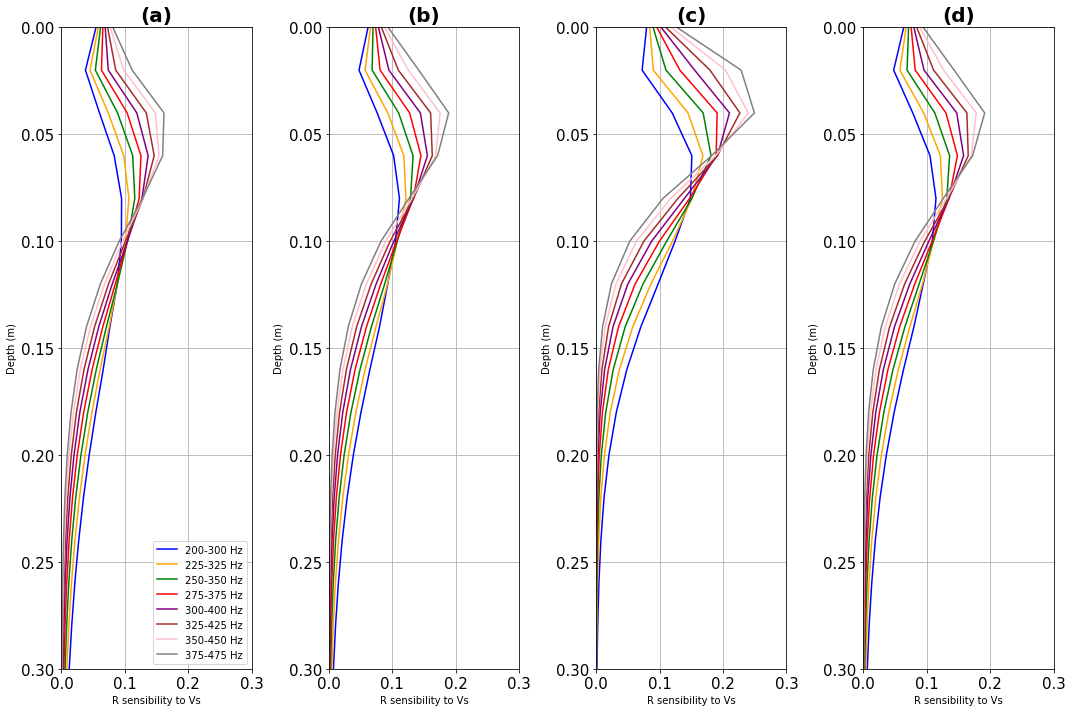

In [17]:
fig = plt.figure(figsize=(15,10),constrained_layout=True)
gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[0:2,0])
ax2 = plt.subplot(gs[0:2, 1])
ax3 = plt.subplot(gs[0:2, 2])
ax4 = plt.subplot(gs[0:2, 3])
ax1.set_title('(a)',fontsize=20,y=1,fontweight="bold")
ax2.set_title('(b)',fontsize=20,y=1,fontweight="bold")
ax3.set_title('(c)',fontsize=20,y=1,fontweight="bold")
ax4.set_title('(d)',fontsize=20,y=1,fontweight="bold")

ax=[ax1,ax2,ax3,ax4]
i=0
ts=[times[0]*6,times[4]*6,1530*6,times[14]*6]
print(ts)
d=np.arange(0,48,2)
d=d*10**-2
colors=np.asarray(['b','orange','g','r','purple','brown','pink','gray'])
for i in range(len(ts)):
    f1=200
    f2=300
    axs=ax[i]
    j=0
    while j < len(Kpef):
        axs.plot(Kpef[j][ts[i]//10][0:24],d,color=colors[j],label=f'{f1}-{f2} Hz')
        #axs.plot(Ksol[j][ts[i]//60][0:24],d,'--',label=f'{f1}-{f2} Hz')
        j+=1
        f1+=25
        f2+=25
    axs.grid()
    axs.set_xlabel('R sensibility to Vs')
    axs.set_ylabel('Depth (m)')
    axs.set_ylim(0.3,0)
    axs.tick_params(axis='both', which='major', labelsize=15)
    axs.set_xlim(0,0.3)

ax[0].legend()
fig.tight_layout()
#plt.savefig('F:\Fig_to_make/Kernel_time.pdf',format='pdf',bbox_inches='tight',dpi=300)
#plt.savefig('F:\Fig_to_make/Kernel_time.jpg',format='jpg',bbox_inches='tight',dpi=300)

0
(24, 25920)
1
(24, 25920)
2
(24, 25920)
3
(24, 25920)


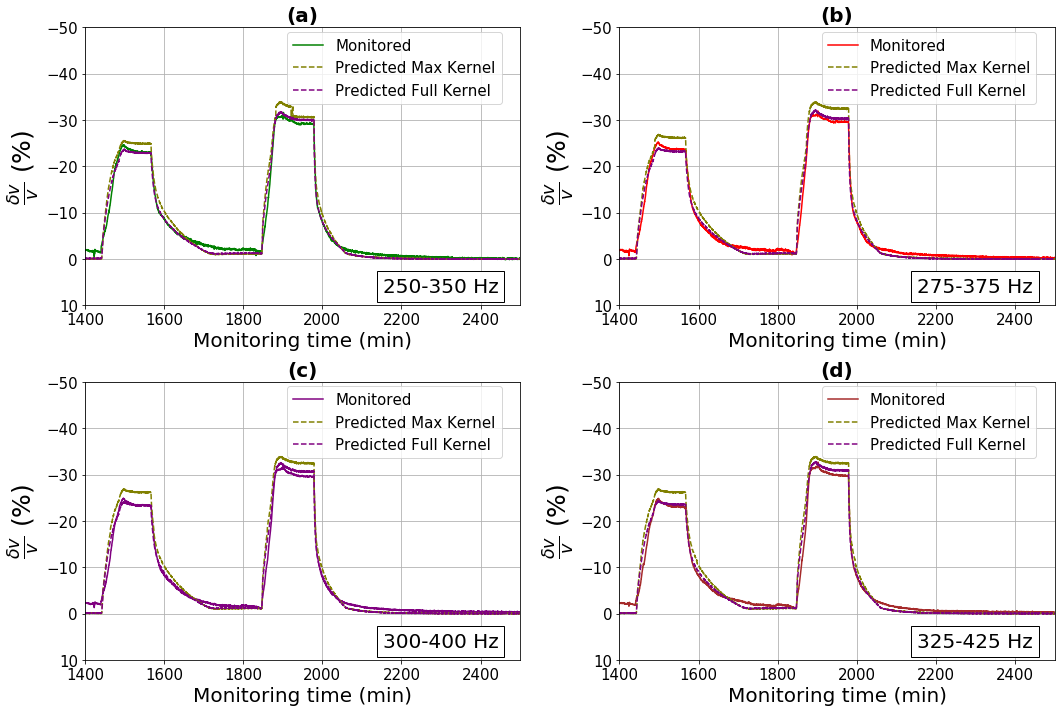

In [18]:
#dvff=np.load('G:/Final_frequency_dv.npy')
dvff=np.load(r'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\dv/Final_frequency_dv_15_trace.npy')
D=np.asarray(dvff)
DV=np.asarray(dvff)
from scipy import signal
col=np.asarray(['blue','orange','green','red','purple','brown','pink','grey'])
C=np.asarray(['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)'])
fig, axs = plt.subplots(2,2,figsize=(15,10), facecolor='w', edgecolor='k')
axs=axs.ravel()
dvf1=200
dvf2=300
dvwet=[]
DV=[]
dvdry=[]
dvf1=200
dvf2=300
DVSOLAZI=[]
DVPEFF=[]
colors=np.asarray(['b','orange','g','r','purple','brown','pink','gray'])
n=0
idx=np.asarray([2,3,4,5])
dvf1s=np.asarray([200,225,250,275,300,325,350,375])
dvf2s=np.asarray([200,225,250,275,300,325,350,375])+100
for i in range(idx.size):
    print(i)
    ax=axs[i]
    dvf1=dvf1s[idx[i]]
    dvf2=dvf2s[idx[i]]
    dv=dvff[idx[i]]#[8000::]
    t=tT#[8000::]
    ax.plot(t,dv,color=colors[idx[i]],label=f'Monitored')#
    #Kernel=np.load(rf'C:\Hydro_modele\Kernel\Frequence\{dvf1}_{dvf2}\Kernel_{0}.npy')
    KernelPeff=np.load(rf'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Kernel\Peff_52_{dvf1}_{dvf2}_Kernel_end.npy',allow_pickle=True)
    idxPeff=np.load(rf'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Kernel\Peff_52_{dvf1}_{dvf2}_indice_end.npy',allow_pickle=True)
    KernelSol=np.load(rf'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Kernel\Peff_50_{dvf1}_{dvf2}_Kernel_end.npy',allow_pickle=True)
    idxSol=np.load(rf'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Kernel\Peff_50_{dvf1}_{dvf2}_indice_end.npy',allow_pickle=True)
    data=[]
    data2=[]
    for j in range(0,New_Depth.size):#depth.size-1):
        data.append(dvs2[j])
        data2.append(dvs1[j])
    print(np.shape(data))
    dvv=[]
    dvvsolazi=[]
    data=np.asarray(data)
    data2=np.asarray(data2)
    dvvPeff=[]
    for k in range(25920):
        index_kernelP=(find_nearest(idxPeff,k))
        index_kernelS=(find_nearest(idxSol,k))
        #if  np.trapz((KernelPeff[index_kernel][0:24]))!=1:
        #    KernelPeff[index_kernel][0:24]=Kernel[index_kernel][0:24]*(1/np.trapz((Kernel[index_kernel][0:24])))
        dvvPeff.append(np.trapz((KernelPeff[index_kernelP][0:24])*data[:,k]))
        idxmax=np.argmax(KernelPeff[index_kernelP])
        dvvsolazi.append(data[idxmax,k])

    #ax.plot(tT,dvvsolazi,'--',color='olive',label=f'Predicted Solazi {dvf1}-{dvf1+100} Hz')
    ax.plot(tT,dvvsolazi,'--',color='olive',label=f'Predicted Max Kernel')
    ax.plot(tT,dvvPeff,'--',color='purple',label=f'Predicted Full Kernel')

    ax.set_xlim(1400,2500)
    ax.legend(fontsize=15,loc=(0.465,0.725))
    ax.grid()
    ax.set(xlabel='Monitoring time (min)', xlim=[1400,2500],
           ylabel=r'$\delta v$ (%)', ylim=[-50,10])
    ax.set_xlabel('Monitoring time (min)',fontsize=20)
    ax.set_ylabel(r'$\frac{\delta v}{v}$ (%)',fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_title(C[i],fontsize=20,y=1,fontweight="bold")
    ax.set_ylim(10,-50)
    DVPEFF.append(np.asarray(dvvPeff))
    ax.annotate(rf'{dvf1}-{dvf2} Hz', (2200, 4),
            xytext=(0.95, 0.1), textcoords='axes fraction',
            ha="right", va="top",
            bbox=dict(boxstyle="square",
                   ec=(0., 0, 0),
                   fc=(1., 1, 1),
                   )    ,        
            fontsize=20,
            horizontalalignment='right', verticalalignment='top')    #ax.plot(tT,DV[i],'--',color='purple',label=f'Predicted {dvf1}-{dvf1+100} Hz')

    n+=1
fig.tight_layout()
#plt.savefig('F:\Fig_to_make/ModelKernelfrequency_color_interp_Sw_ref_4slot.pdf',format='pdf',bbox_inches='tight',dpi=300)
#plt.savefig('F:\Fig_to_make/ModelKernelfrequency_color_interp_Sw_ref_4slot.jpg',format='jpg',bbox_inches='tight',dpi=300)